# Raport ze studium przypadku — Analiza zbioru danych "Eurovision Song Contest Data"

Autor: Daniel Zdancewicz 145317
Przedmiot: Systemy uczenia się

## Zbiór Danych

W studium wykorzystano zbiór danych dostępny na stronie [Kaggle](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data)

Zbiór danych zawiera informacje o konkursie piosenki Eurowizji od 2009 do 2022 roku (z pominięciem 2020, w którym eurowizja się nie odbyła z powodu pandemii). Zbiór danych zawiera 49 plików CSV:
- Nieużywany podczas badania — 41 plików z danymi o dokładnych wynikach głosowania z lat 2016-2022 podzielonych na głosy jury oraz głosy widzów.
  - Katalog [Final Results](./resources/datasets/eurovision/Final%20Results) zawiera dane o wynikach finałów konkursów podzielone na głosy jury ([Jury](./resources/datasets/eurovision/Final%20Results/Jury)) oraz głosy widzów ([Televote](./resources/datasets/eurovision/Final%20Results/Televote)).
  - Katalog [Polls](./resources/datasets/eurovision/Polls) zawiera dane o głosach widzów w finałach konkursów z lat 2016-2022 podzielone na głosy dokonane na różnych platformach. (Discord/EuroJury/Eurovision World/My Eurovision Scoreboard/OGAE/Wiwibloggs)
- 3 pliki z danymi
  - Nieużywany podczas badania — [contest_data.csv](./resources/datasets/eurovision/contest_data.csv) — metadane o konkursie z lat (2009-2021)
  - Nieużywany podczas badania — [country_data.csv](./resources/datasets/eurovision/country_data.csv) — dane o krajach uczestniczących w konkursie na przestrzeni lat (2009-2022)
  - [song_data.csv](./resources/datasets/eurovision/song_data.csv) — dane o piosenkach z lat 2009-2022, z informacjami o tym, jaka ranga została osiągnięta przez piosenkę w konkursie w półfinałach i finałach oraz informacje dotyczące wykonawców piosenki jak i liczba głosów jury i widzów (od 2014 roku).
    - Jeżeli w kolumnie rankingowej znajduje się wartość -, oznacza to, że piosenka nie zakwalifikowała się do finału / nie występuje w finale.
Niektóre z plików CSV zawierają niepełne dane z powodu pandemii, która uniemożliwiła przeprowadzenie konkursu w 2020 roku, oraz z powodu braku jawnej formy głosowania przez widzów przed 2014.

## Uwagi dotyczące zbioru danych

- Państwo, które wygrało rok wcześniej, automatycznie jest w finale i nie bierze udziału w półfinałach.
- Państwa, które są w grupie "Big 5" automatycznie są w finale (Francja, Niemcy, Hiszpania, Włochy, Wielka Brytania).
- Państwa, które nie dostały się do finału/pół-finału, nie są uwzględniane w zbiorze danych.
- Państwo nie może głosować na siebie.

Nie użyto pliku z danymi [contest_data.csv](./resources/datasets/eurovision/contest_data.csv) oraz [country_data.csv](./resources/datasets/eurovision/country_data.csv) ze względu na brak informacji, które mogłyby być wykorzystane w eksperymentach, oraz ich niespójności z pozostałymi danymi. Natomiast katalog [Polls](./resources/datasets/eurovision/Polls) z braku pokrycia z celem badania.


## Transformacja danych
Definicja odczytu oraz transformacje znajdują się w pliku [dataset.py](./dataset.py).

W celu przeprowadzenia eksperymentów dane zostały przekształcone w następujący sposób:
- Dane o piosenkach z lat 2009-2022 otrzymały dodatkowe kolumny mówiące o tym, czy język, w którym zaśpiewano piosenkę, jest językiem ojczystym.
- Dane z katalogu o wynikach finałów zostały złączone, usuwając podział na pliki jurów i widzów.
- Zostały obliczone agregacje wyników względem przeciętnie oddanych liczb głosów przez państwa na inne państwa.
- Myślniki w danych songs_data.csv zostały zamienione na 0, co oznaczało "Nie dotyczny/Nie zakwalifikował się".

## Cel badania

W badaniu postawiono następujące pytania:
- Czy istnieje dysonans między wynikami głosowania jury a widzów?
- Czy piosenki w języku angielskim mają większe szanse na wygraną?
- Czy piosenki w języku ojczystym mają większe szanse na wygraną?

Badanie w eksperymentach wykorzystało dane podzielone na 2 rodzaje:
- Wyniki w półfinałach i finałach konkursu z lat 2009-2022 przez głosy jury.
- Wyniki w finałach konkursu z lat 2016-2022 podzielone na głosy widzów i jury.

## Bibliografia

- ODI6s. Eurovision song contest data, 2022. Song data, poll results, and contest results. URL: [www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data](https://www.kaggle.com/datasets/diamondsnake/eurovision-song-contest-data).


## Obligatoryjne importy

In [1]:
from dataset import EurovisionDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Wstępna eksploracja danych

In [2]:
dataset = EurovisionDataset.load()

dataset.songs

,year,semi_draw_position,final_draw_position,country,artist_name,song_name,language,style,direct_qualifier_10,gender,...,final_total_points,semi_place,semi_televote_points,semi_jury_points,semi_total_points,favourite_10,race,host_10,in_english,in_native
0,2022,1,-,Albania,Ronela Hajati,Sekret,"Albanian, English",Pop,-,Female,...,0.0,12,46.0,12.0,58.0,0,white,0,False,False
1,2022,2,-,Latvia,Citi Zeni,Eat Your Salad,English,Pop,-,Male,...,0.0,14,16.0,39.0,55.0,0,white,0,True,False
2,2022,3,14,Lithuania,Monika Liu,Sentimentai,Lithuanian,Ballad,0,Female,...,128.0,7,103.0,56.0,159.0,0,white,0,False,True
3,2022,4,5,Switzerland,Marius Bear,Boys Do Cry,English,Ballad,0,Male,...,78.0,9,11.0,107.0,118.0,0,white,0,True,False
4,2022,5,-,Slovenia,LPS,Disko,Slovene,Pop,-,Male,...,0.0,17,8.0,7.0,15.0,0,white,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2009,-,3,France,Patricia Kaas,Et s'il fallait le faire,French,Ballad,1,Female,...,218.0,0,0.0,0.0,0.0,0,unknown,0,False,True
524,2009,-,10,Russia,Anastasiya Prikhodko,Mamo,"Russian,Ukrainian",Ballad,1,Female,...,185.0,0,0.0,0.0,0.0,0,unknown,1,False,False
525,2009,-,17,Germany,AlexSwingsOscarSings!,Miss Kiss Kiss Bang,English,Pop,1,Male,...,91.0,0,0.0,0.0,0.0,0,unknown,0,True,False
526,2009,-,23,United Kingdom,Jade Ewen,It's My Time,English,Ballad,1,Female,...,328.0,0,0.0,0.0,0.0,0,unknown,0,True,True


In [3]:
dataset.songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   528 non-null    int64  
 1   semi_draw_position     528 non-null    object 
 2   final_draw_position    528 non-null    object 
 3   country                528 non-null    object 
 4   artist_name            528 non-null    object 
 5   song_name              528 non-null    object 
 6   language               528 non-null    object 
 7   style                  528 non-null    object 
 8   direct_qualifier_10    528 non-null    object 
 9   gender                 528 non-null    object 
 10  main_singers           528 non-null    int64  
 11  age                    528 non-null    object 
 12  selection              528 non-null    object 
 13  key                    528 non-null    object 
 14  BPM                    528 non-null    object 
 15  energy

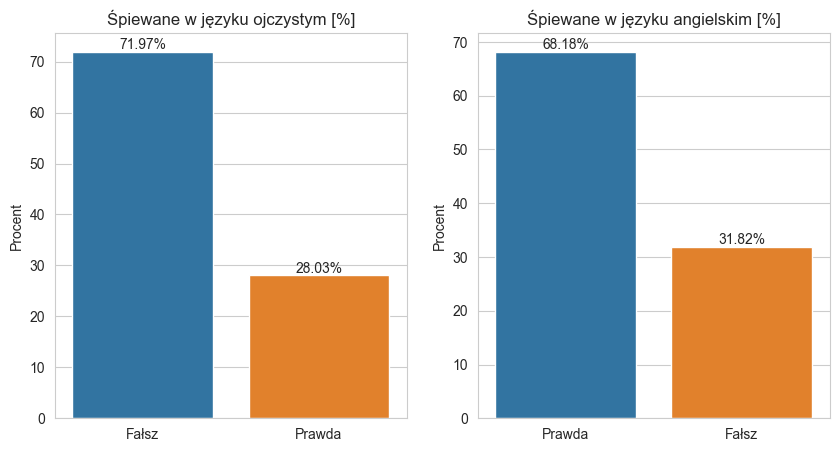

In [4]:
in_native = dataset.songs.in_native.value_counts() / len(dataset.songs) * 100
in_english = dataset.songs.in_english.value_counts() / len(dataset.songs) * 100

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x=in_native.index.map({True: 'Prawda', False: 'Fałsz'}), y=in_native.values, ax=ax[0])
sns.barplot(x=in_english.index.map({True: 'Prawda', False: 'Fałsz'}), y=in_english.values, ax=ax[1])
ax[0].set_title('Śpiewane w języku ojczystym [%]')
ax[1].set_title('Śpiewane w języku angielskim [%]')
for a in ax:
  a.set_ylabel('Procent')
  a.bar_label(a.containers[0], fmt='%.2f%%')
plt.show()

### Wnioski ze wstępnej eksploracji danych

Widać, że klasy nie są zbalansowane i widać, że państwa częściej postanawiają wybór śpiewania w języku angielskim niż w języku ojczystym. (czego się spodziewano)


## Czy istnieje dysonans między wynikami głosowania jury a widzów?


### Wyniki w finałach konkursu z lat 2016-2022 przez głosy jury i widzów.


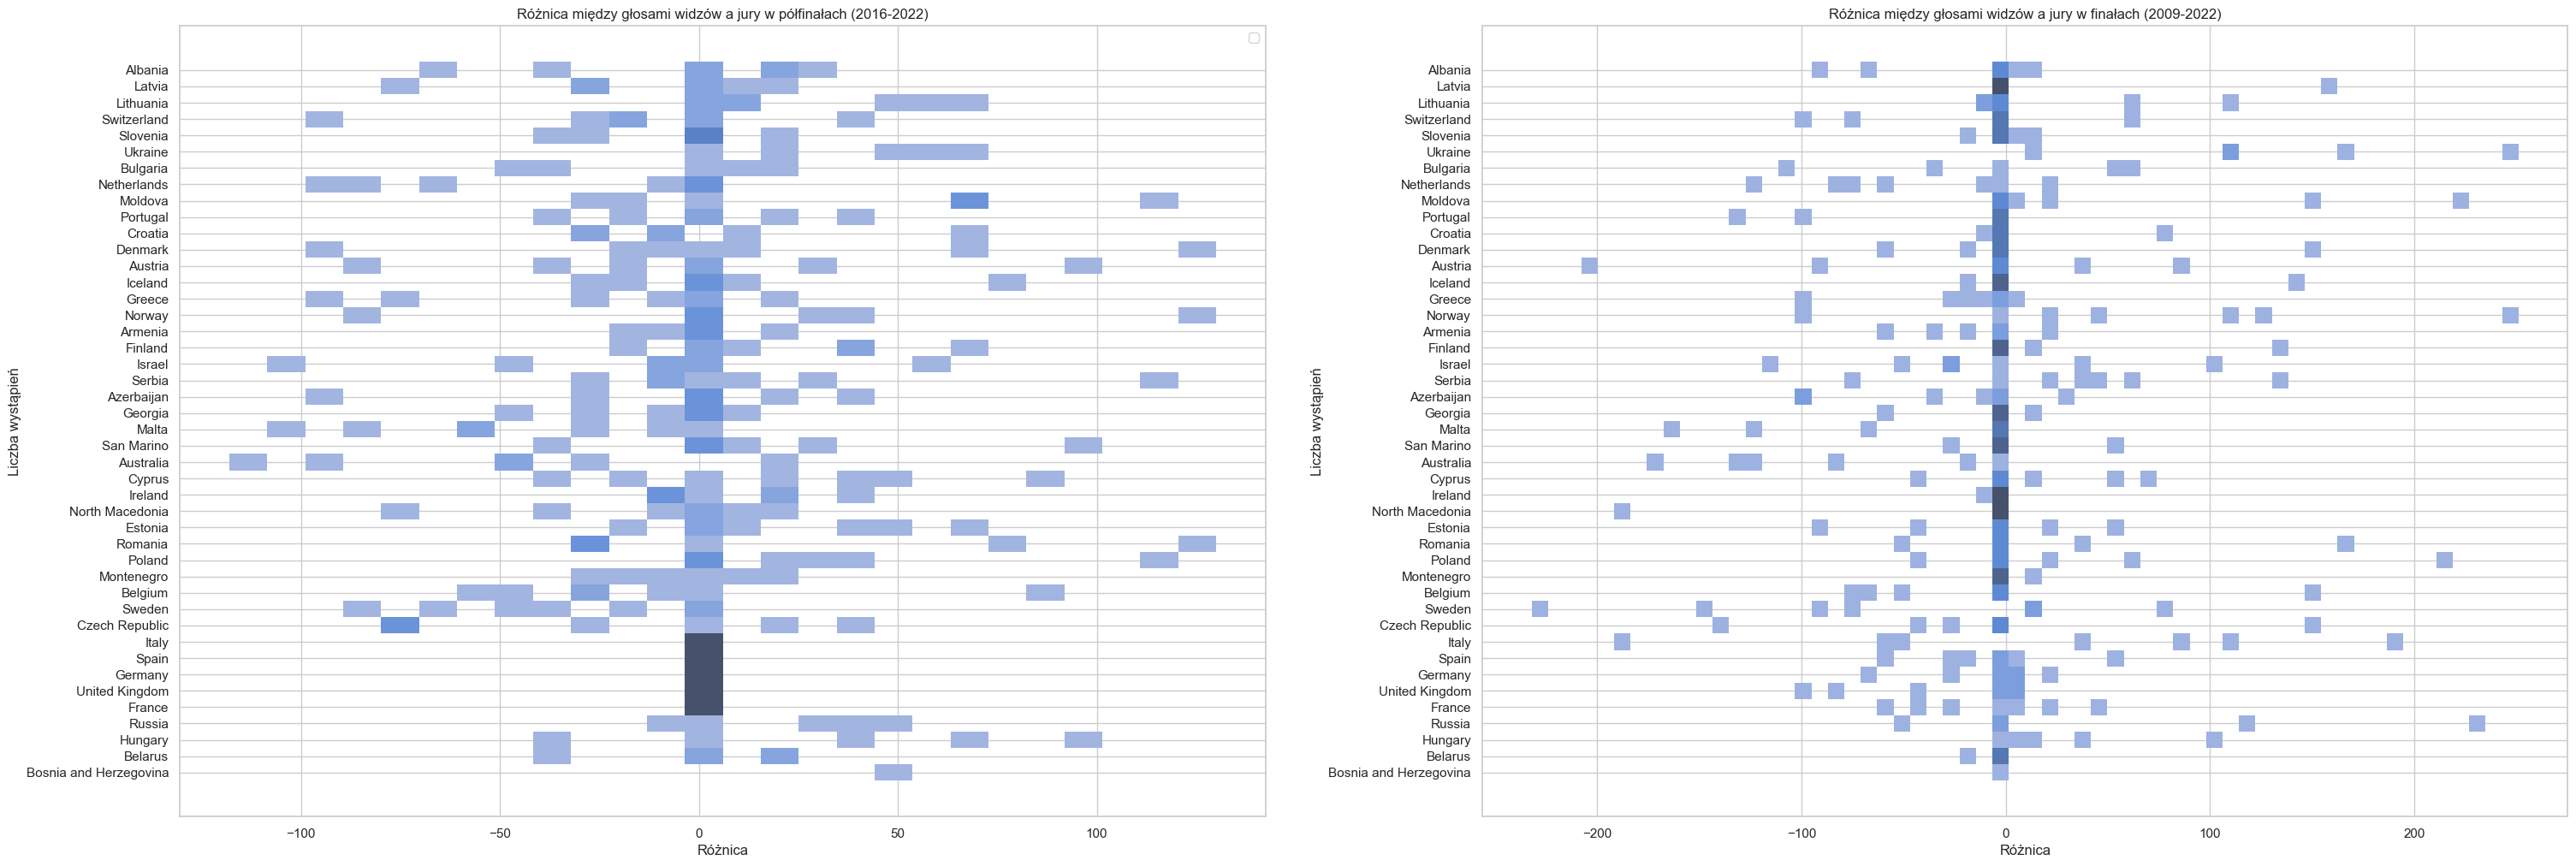

In [5]:
sns.set_theme(style="whitegrid")

dataset.songs['semi_difference_points'] = dataset.songs.semi_televote_points - dataset.songs.semi_jury_points
dataset.songs['final_difference_points'] = dataset.songs.final_televote_points - dataset.songs.final_jury_points

fig, ax = plt.subplots(1, 2, figsize=(36, 12))

sns.histplot(x='semi_difference_points', y='country', data=dataset.songs[dataset.songs.year > 2014], ax=ax[0])
sns.histplot(x='final_difference_points', y='country', data=dataset.songs[dataset.songs.year > 2014], ax=ax[1])

ax[0].set_title('Różnica między głosami widzów a jury w półfinałach (2016-2022)')
ax[1].set_title('Różnica między głosami widzów a jury w finałach (2009-2022)')

for a in ax:
  a.set_xlabel('Różnica')
  a.set_ylabel('Liczba wystąpień')

ax[0].legend(loc='upper right', labels=['Widzowie', 'Jury'])

plt.show()

## Na kogo głosuje jury, a na co widzowie?

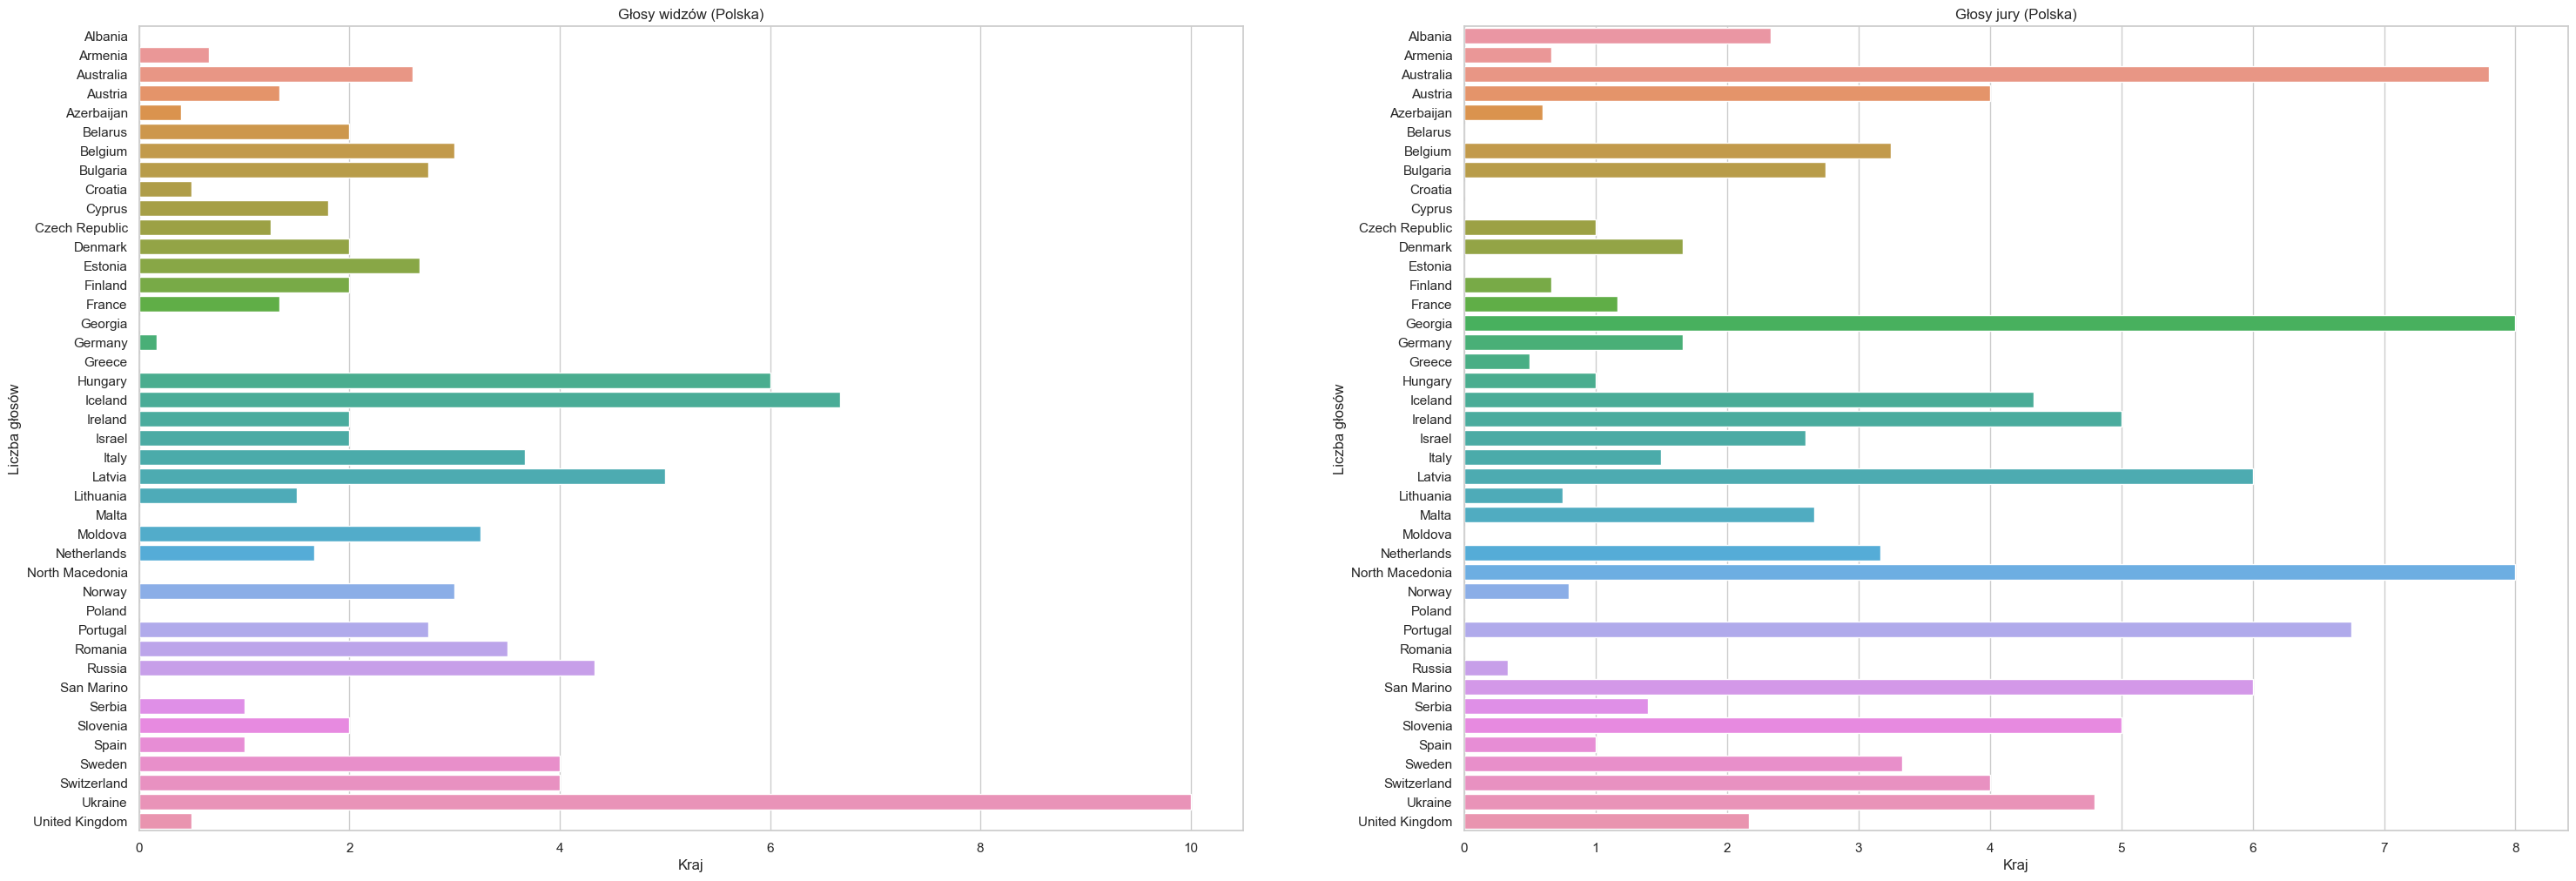

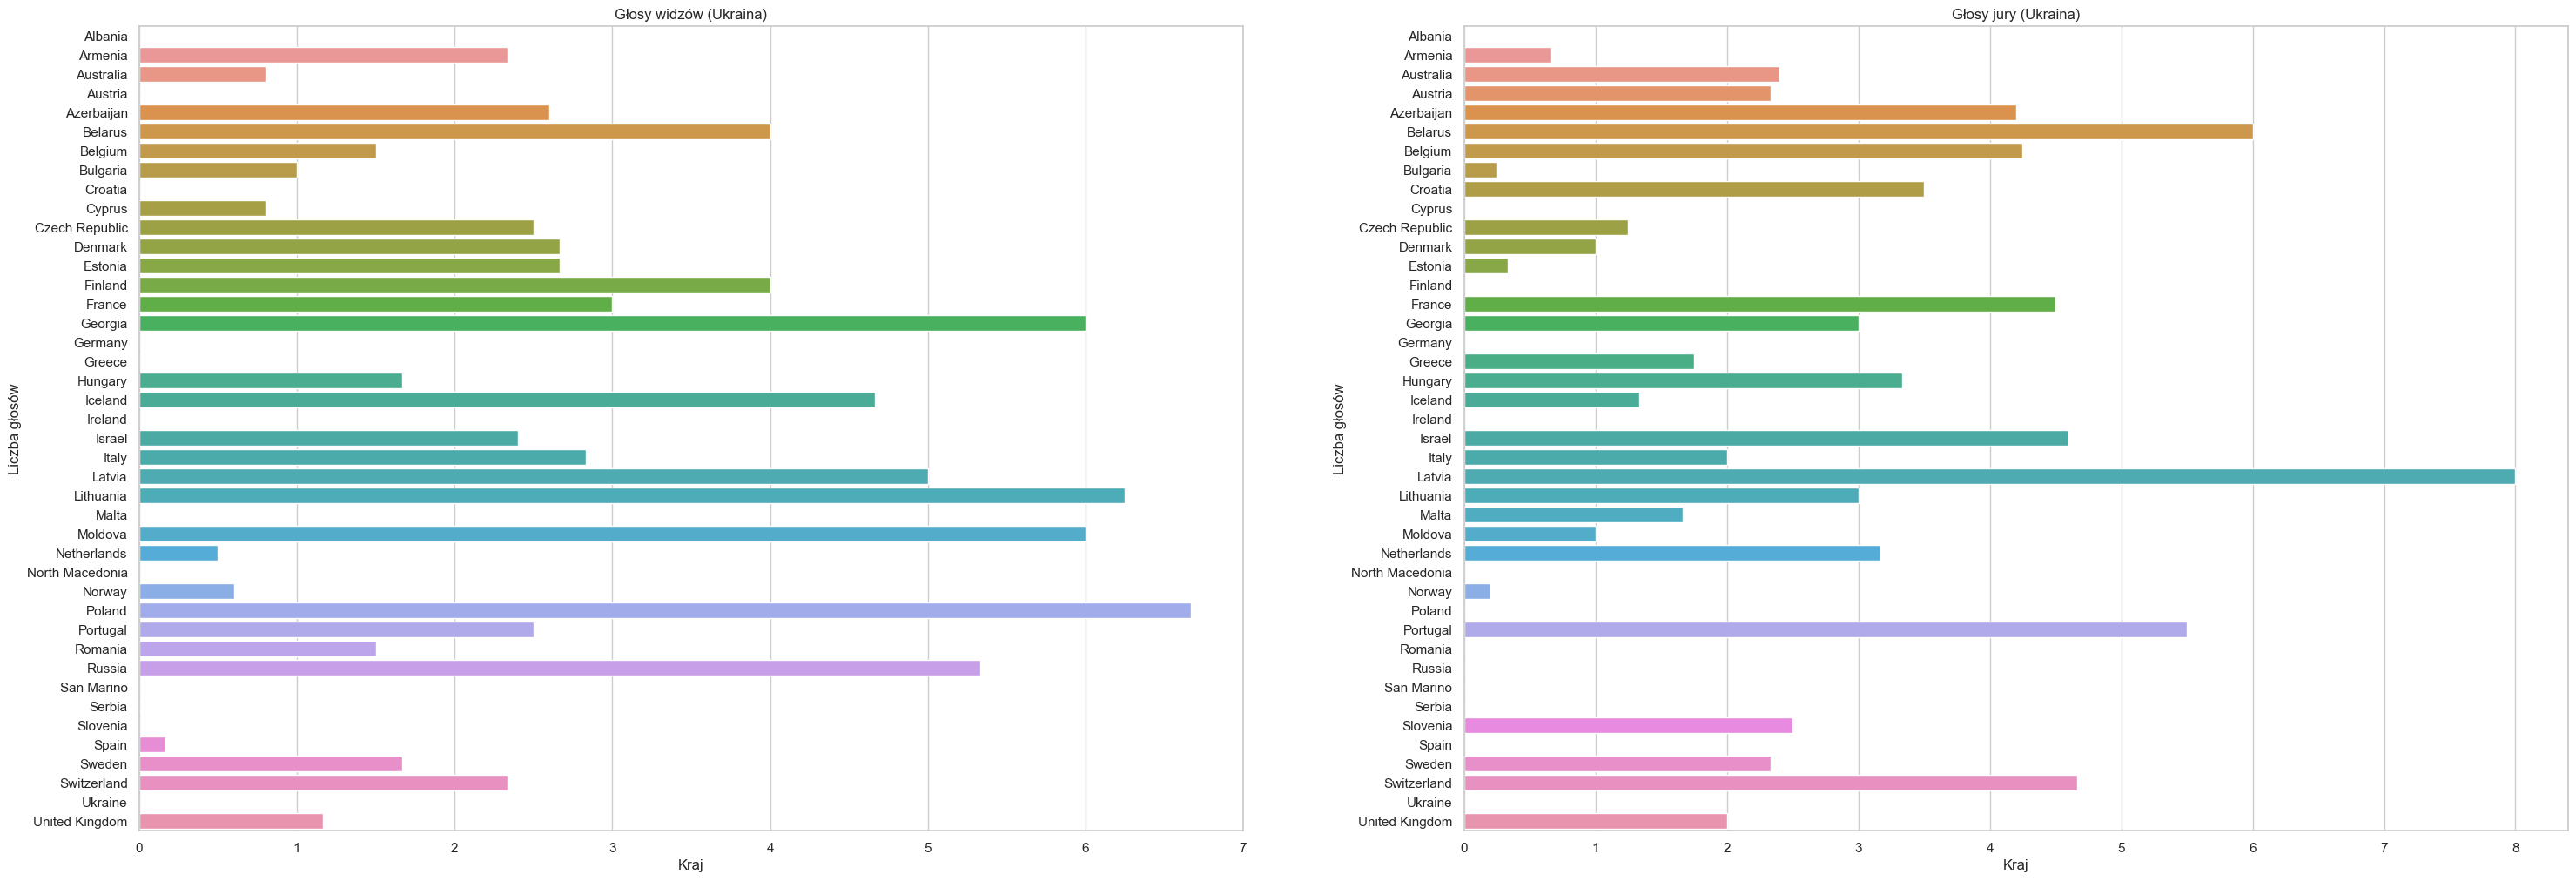

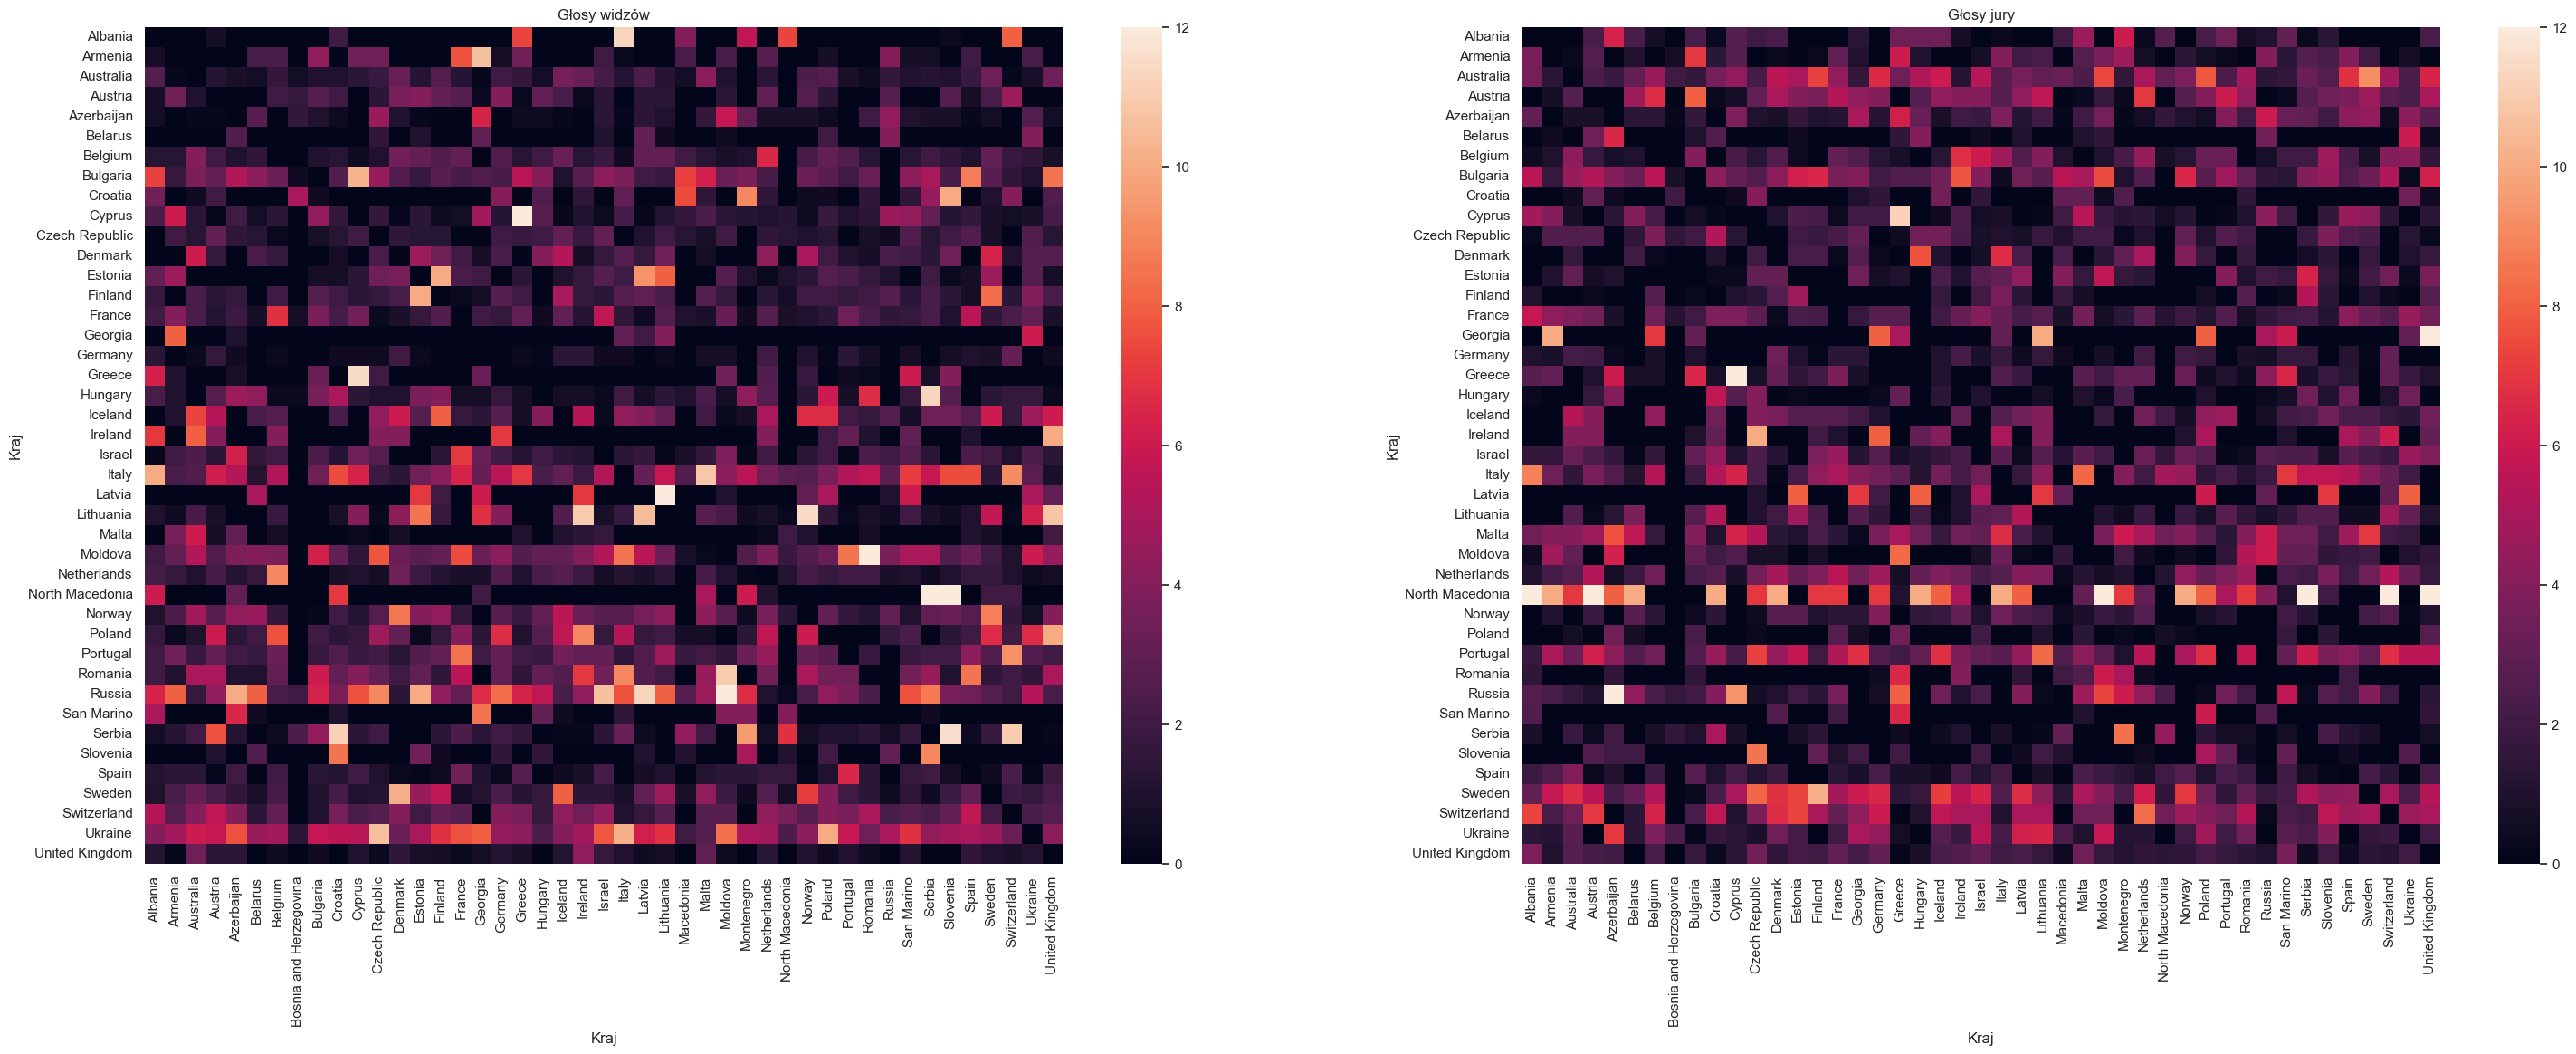

In [9]:
# interesujące nas kolumny
# ['Tele-[Country]', '[Jury-[Country]']

tele_columns = [c for c in dataset.votes.all.columns if c.startswith('Tele-')]
jury_columns = [c for c in dataset.votes.all.columns if c.startswith('Jury-')]

tele_votes = dataset.votes.all[tele_columns].rename(columns=lambda x: x.replace('Tele-', ''))
tele_votes.fillna(0, inplace=True)
jury_votes = dataset.votes.all[jury_columns].rename(columns=lambda x: x.replace('Jury-', ''))
jury_votes.fillna(0, inplace=True)

fig, ax = plt.subplots(1, 2, figsize=(36, 12))

sns.barplot(x=tele_votes['Poland'], y=tele_votes.index, ax=ax[0])
sns.barplot(x=jury_votes['Poland'], y=jury_votes.index, ax=ax[1])

ax[0].set_title('Głosy widzów (Polska)')
ax[1].set_title('Głosy jury (Polska)')

for a in ax:
  a.set_xlabel('Kraj')
  a.set_ylabel('Liczba głosów')

plt.show()
fig, ax = plt.subplots(1, 2, figsize=(36, 12))

sns.barplot(x=tele_votes['Ukraine'], y=tele_votes.index, ax=ax[0])
sns.barplot(x=jury_votes['Ukraine'], y=jury_votes.index, ax=ax[1])

ax[0].set_title('Głosy widzów (Ukraina)')
ax[1].set_title('Głosy jury (Ukraina)')

for a in ax:
  a.set_xlabel('Kraj')
  a.set_ylabel('Liczba głosów')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(36, 12))

sns.heatmap(tele_votes, ax=ax[0])
sns.heatmap(jury_votes, ax=ax[1])

ax[0].set_title('Głosy widzów')
ax[1].set_title('Głosy jury')

for a in ax:
  a.set_xlabel('Kraj')
  a.set_ylabel('Kraj')

plt.show()


### Wnioski

Jury, a widzowie mają różne preferencje. Widzowie głosują na występy, trochę politycznie (Nikt nie głosuje na Zjednoczone królestwo, bo nie potrafią śpiewać; Ukraina wiadomo), a jury na sąsiadów i politykę. (Ktokolwiek głosuje na UK (sąsiedzi polityczni), Cypr na Grecję, Grecja na Cypr, Rosja na Azerbejdżan etc.). Wnioskuję to na podstawie, że istnieje mniejszy szum wśród jury, niż u widzów. (Widzowie głosują na to, co im się podoba (szumne), a nie na sąsiadów) oraz tego, że istnieje ewidentny dysonans między głosami widzów a jury.


## Czy państwa śpiewające w języku ojczystym mają większe szanse na wygraną?

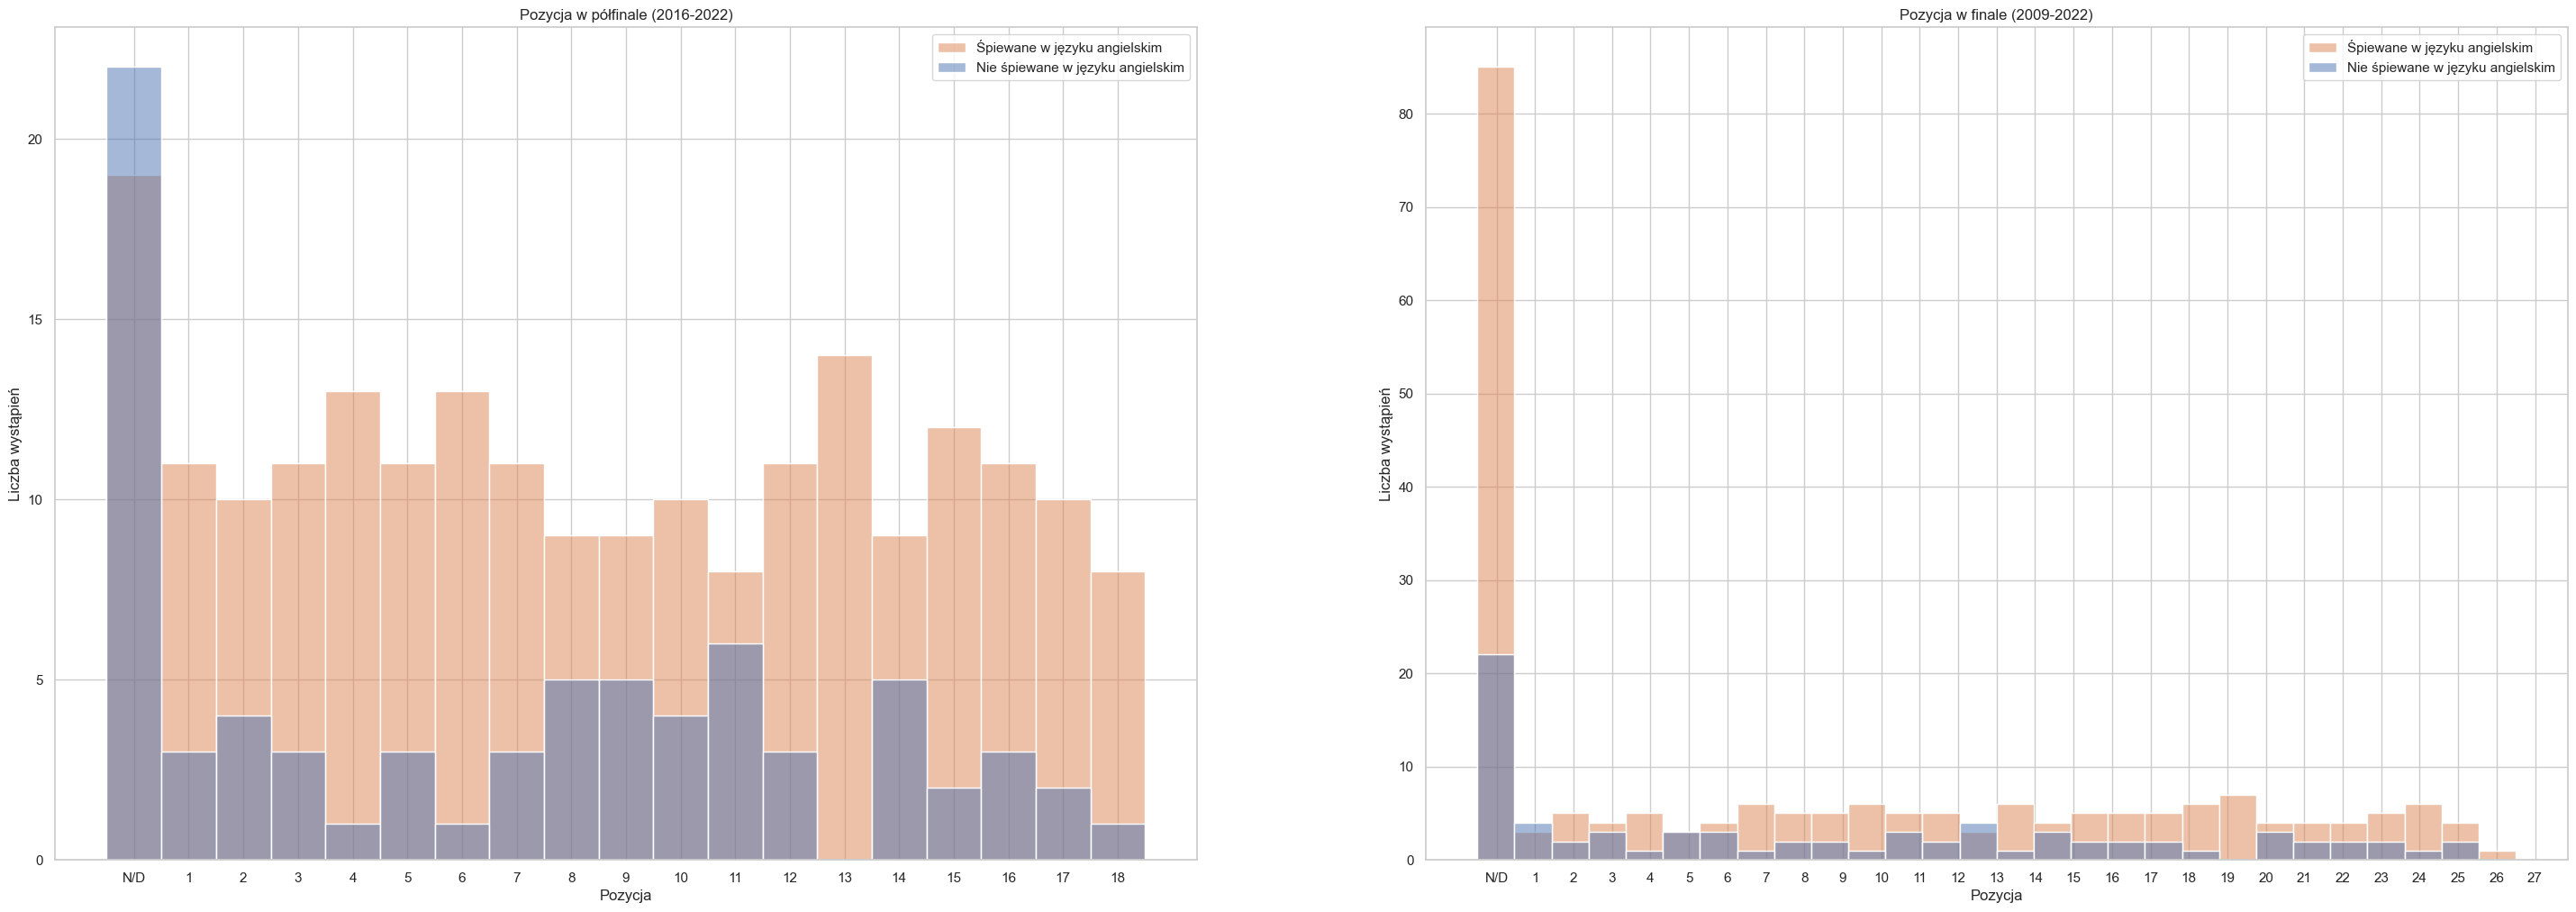

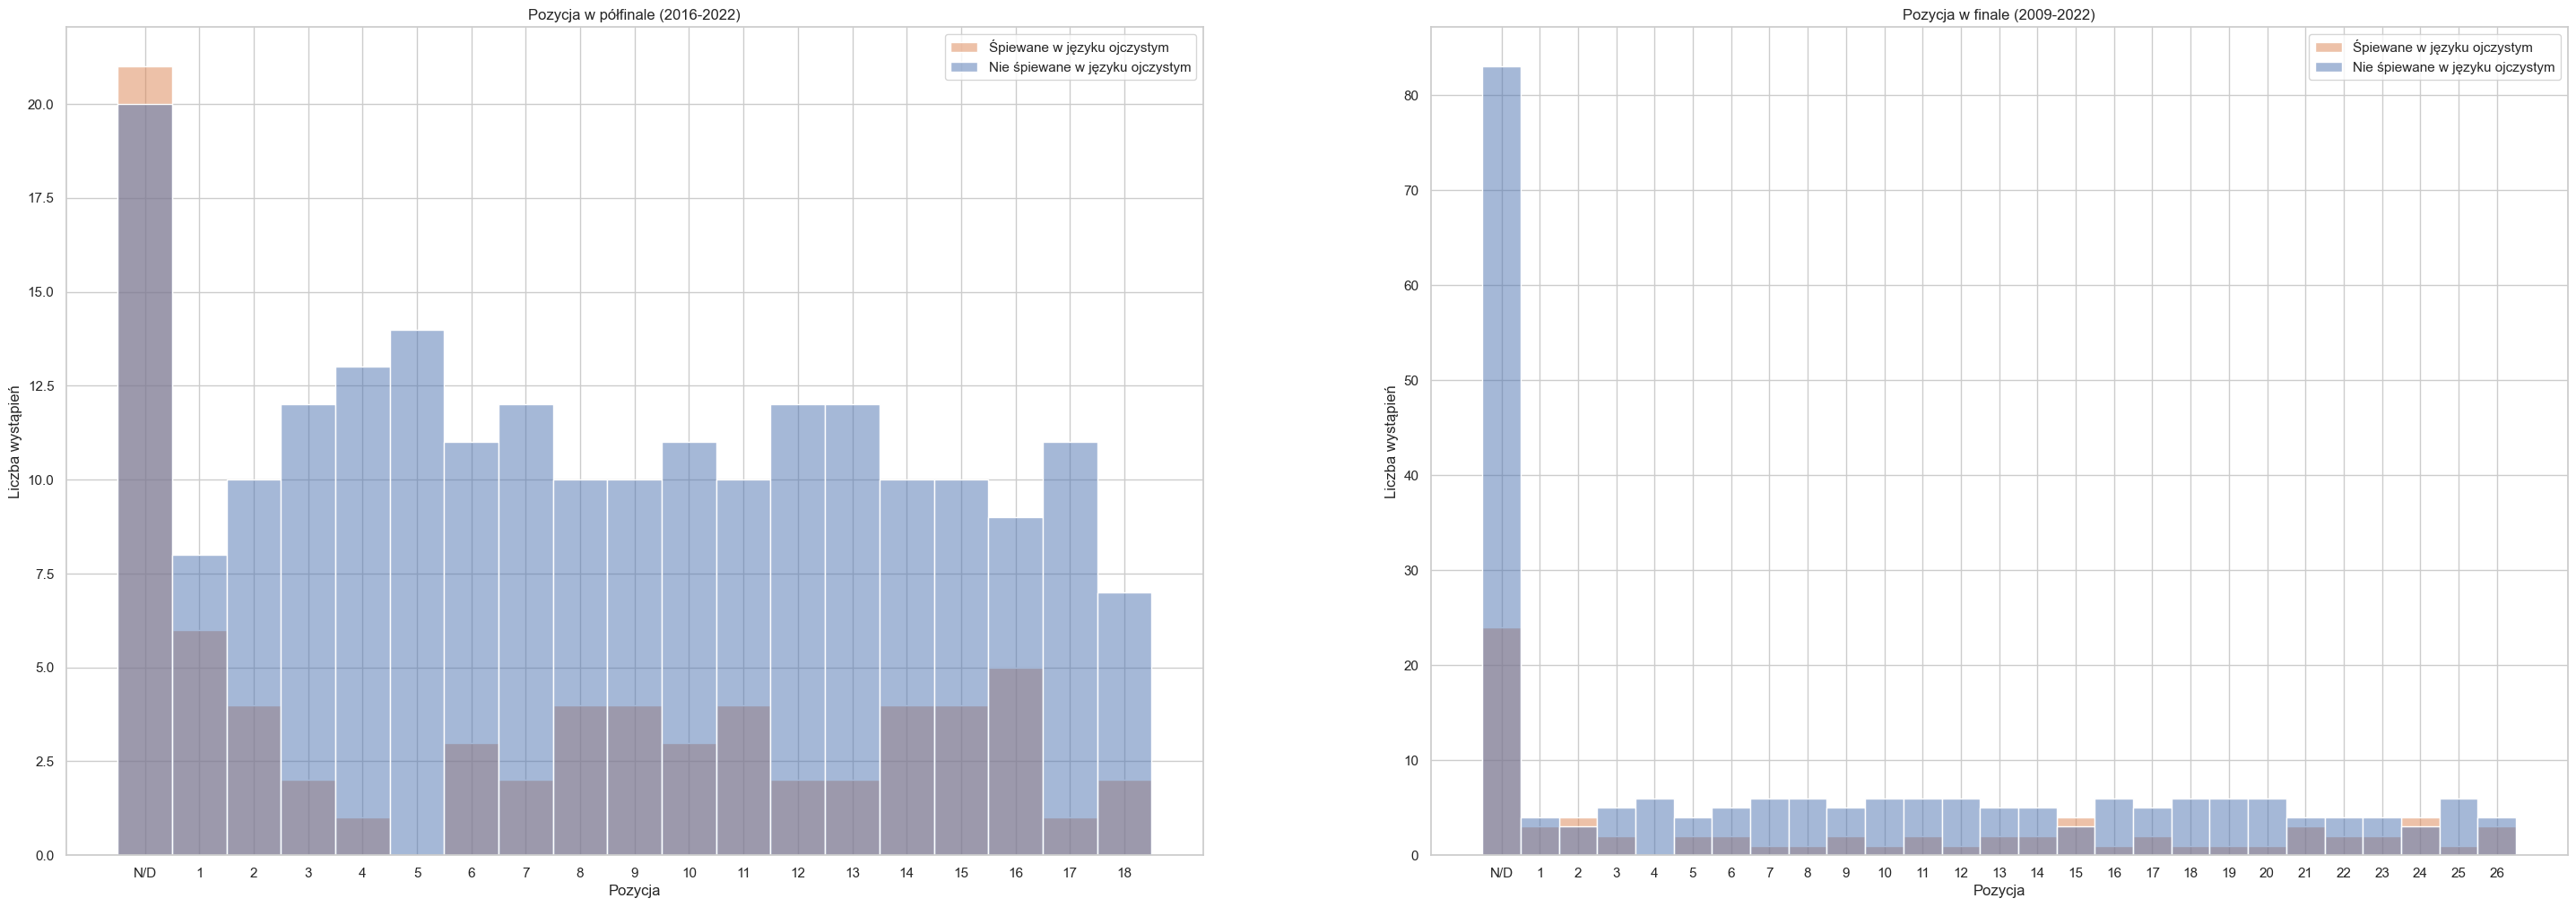

In [7]:
# interesujące nas kolumny
# dataframe: songs
# ['in_english', 'in_native', 'country', 'semi_position', 'final_position']

fig, ax = plt.subplots(1, 2, figsize=(36, 12))

sns.histplot(x='semi_place', hue='in_english', data=dataset.songs[dataset.songs.year > 2014], ax=ax[0], bins=19)
sns.histplot(x='final_place', hue='in_english', data=dataset.songs[dataset.songs.year > 2014], ax=ax[1],
             bins=28)

ax[0].set_title('Pozycja w półfinale (2016-2022)')
ax[1].set_title('Pozycja w finale (2009-2022)')

for a in ax:
  a.set_xlabel('Pozycja')
  a.set_ylabel('Liczba wystąpień')

ax[0].legend(loc='upper right', labels=['Śpiewane w języku angielskim', 'Nie śpiewane w języku angielskim'])
ax[1].legend(loc='upper right', labels=['Śpiewane w języku angielskim', 'Nie śpiewane w języku angielskim'])

ax[0].set_xticks([x + 0.5 for x in range(0, 19)], ['N/D', *range(1, 19)])
ax[1].set_xticks([x + 0.5 for x in range(0, 28)], ['N/D', *range(1, 28)])

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(36, 12))

sns.histplot(x='semi_place', hue='in_native', data=dataset.songs[dataset.songs.year > 2014], ax=ax[0], bins=19)
sns.histplot(x='final_place', hue='in_native', data=dataset.songs[dataset.songs.year > 2014], ax=ax[1], bins=27)

ax[0].set_title('Pozycja w półfinale (2016-2022)')
ax[1].set_title('Pozycja w finale (2009-2022)')
for a in ax:
  a.set_xlabel('Pozycja')
  a.set_ylabel('Liczba wystąpień')

ax[0].legend(loc='upper right', labels=['Śpiewane w języku ojczystym', 'Nie śpiewane w języku ojczystym'])
ax[1].legend(loc='upper right', labels=['Śpiewane w języku ojczystym', 'Nie śpiewane w języku ojczystym'])

ax[0].set_xticks([x + 0.5 for x in range(0, 19)], ['N/D', *range(1, 19)])
ax[1].set_xticks([x + 0.5 for x in range(0, 27)], ['N/D', *range(1, 27)])

plt.show()



0.3620689655172414


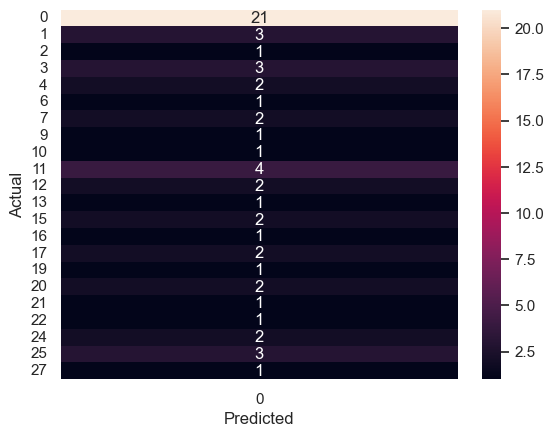

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

songs = dataset.songs[dataset.songs.year > 2014]
songs = songs.dropna(subset=['in_english', 'in_native'])

X = songs[['in_english', 'in_native']]
y = songs['final_place']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Wnioski

Język, w którym śpiewa reprezentant, nie ma wpływu na wynik. Wnioskuję to na podstawie tego, że klasyfikator wyuczony tylko na podstawie języka nie jest w stanie przewidzieć pozycji w finale. (Accuracy score ~0.35).
